In [2]:
!pip install wordcloud==1.8.2.2
from wordcloud import WordCloud, STOPWORDS

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np
import pandas as pd

In [37]:
spwords = set(STOPWORDS)
spwords.add('S')
spwords

{'S',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'o

In [27]:
drama_list = pd.read_csv('./new_drama_info_ver3.csv')

In [28]:
drama_list

,daily_views,drama_name,kor_title,genre,org_net,director,screenwriter,director_drama_num,screenwriter_drama_num,aired_on,...,Business,Family,Historical,Supernatural,Law,Political,Psychological,Crime,Medical,etc
0,2176094,D.P. Season 2,디피 시즌2,"['Action', 'Military', 'Drama']",Netflix,['Han Jun Hee'],['Kim Bo Tong'],1,2,Friday,...,0,0,0,0,0,0,0,0,0,1
1,1823835,Shadow Detective Season 2,형사록 시즌2,"['Mystery', 'Drama']",Disney+,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",6,1,Wednesday,...,0,0,0,0,0,0,0,0,0,0
2,4419287,Celebrity,셀러브리티,"['Thriller', 'Mystery', 'Drama']",Netflix,['Kim Chul Gyu'],['Kim Yi Young'],7,3,Friday,...,0,0,0,0,0,0,0,0,0,0
3,248365,Numbers,넘버스: 빌딩숲의 감시자들,"['Action', 'Thriller', 'Mystery', 'Drama']",MBC,['Kim Chil Bong'],"['Oh Hye Seok', 'Jung An']",3,1,"Friday, Saturday",...,0,0,0,0,0,0,0,0,0,0
4,651639,Revenant,악귀,"['Thriller', 'Mystery', 'Horror', 'Supernatural']",SBS,"['Lee Jung Rim', 'Kim Jae Hong']",['Kim Eun Hee'],5,8,"Friday, Saturday",...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,1036,It's My Life,비켜라 운명아,"['Business', 'Romance', 'Drama', 'Melodrama']",KBS1,['Kwak Gi Won'],['Park Gye Hyung'],4,1,"Monday, Tuesday, Wednesday, Thursday, Friday",...,1,0,0,0,0,0,0,0,0,0
902,807,"TV Novel: Waves, Waves",TV소설 파도야 파도야,"['Family', 'Melodrama']",KBS2,['Lee Duk Gun'],"['Lee Hyun Jae', 'Lee Hyang Won']",3,1,"Monday, Tuesday, Wednesday, Thursday, Friday",...,0,1,0,0,0,0,0,0,0,0
903,377,Working Mom Parenting Daddy,워킹맘 육아대디,"['Comedy', 'Drama', 'Family', 'Melodrama']",MBC,"['Park Won Gook', 'Choi Yi Sup']",NaN,6,1,"Monday, Tuesday, Wednesday, Thursday, Friday",...,0,1,0,0,0,0,0,0,0,0
904,48021,The Unusual Family,별난 가족,"['Drama', 'Family', 'Melodrama']",KBS1,['Lee Duk Gun'],['Son Ji Hye'],3,1,"Monday, Tuesday, Wednesday, Thursday, Friday",...,0,1,0,0,0,0,0,0,0,0


In [29]:
sorted_drama_list = drama_list.sort_values(by='daily_views')

In [30]:
sorted_drama_list

,daily_views,drama_name,kor_title,genre,org_net,director,screenwriter,director_drama_num,screenwriter_drama_num,aired_on,...,Business,Family,Historical,Supernatural,Law,Political,Psychological,Crime,Medical,etc
166,112,Do You Want to Eat?,食자해지 밥 묵니껴?,"['Food', 'Family']",MBC,['Kim Sung Moon'],['Marin K'],1,1,Monday,...,0,1,0,0,0,0,0,0,0,1
227,208,2021 Summer Drama Collage: Monster Mansion,2021 썸머 드라마 콜라주: 괴기맨숀,"['Thriller', 'Mystery', 'Horror', 'Supernatural']",Genie TV,['Jo Ba Reun'],['Jo Ba Reun'],1,1,Friday,...,0,0,0,1,0,0,0,0,0,1
719,261,TV Novel: That Sun in the Sky,TV소설 저 하늘에 태양이,"['Romance', 'Drama', 'Family', 'Melodrama']",KBS2,['Kim Shin Il'],"['Kim Ji Wan', 'Lee Jin Suk']",3,3,"Monday, Tuesday, Wednesday, Thursday, Friday",...,0,1,0,0,0,0,0,0,0,0
573,267,Let's Hold Hands Tightly and Watch The Sunset,손 꼭 잡고 지는 석양을 바라보자,"['Romance', 'Drama', 'Family', 'Melodrama']",MBC,"['Kim Sung Yong', 'Jung Ji In']",['Jung Ha Yeon'],4,1,"Wednesday, Thursday",...,0,1,0,0,0,0,0,0,0,0
513,291,"Miss Ma, Nemesis","미스 마, 복수의 여신","['Thriller', 'Mystery', 'Drama']",SBS,"['Min Yeon Hong', 'Lee Jung Hoon']",['Park Jin Woo'],7,1,Saturday,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,2181143,Island Part 2,아일랜드 파트2,"['Action', 'Thriller', 'Horror', 'Fantasy']",Amazon Prime,['Bae Jong'],['Jang Yoon Mi'],2,3,Friday,...,0,0,0,0,0,0,0,0,0,1
85,2311801,Cheer Up,치얼업,"['Mystery', 'Comedy', 'Romance', 'Youth']",SBS,['Han Tae Seob'],['Cha Hye Won'],1,2,"Monday, Tuesday",...,0,0,0,0,0,0,0,0,0,0
219,2699634,Squid Game,오징어 게임,"['Action', 'Thriller', 'Mystery', 'Drama']",Netflix,['Hwang Dong Hyuk'],['Hwang Dong Hyuk'],1,1,Friday,...,0,0,0,0,0,0,0,0,0,0
2,4419287,Celebrity,셀러브리티,"['Thriller', 'Mystery', 'Drama']",Netflix,['Kim Chul Gyu'],['Kim Yi Young'],7,3,Friday,...,0,0,0,0,0,0,0,0,0,0


In [31]:
sorted_drama_list.tail(10)

,daily_views,drama_name,kor_title,genre,org_net,director,screenwriter,director_drama_num,screenwriter_drama_num,aired_on,...,Business,Family,Historical,Supernatural,Law,Political,Psychological,Crime,Medical,etc
616,1320638,Black,블랙,"['Thriller', 'Mystery', 'Supernatural']",OCN,"['Kim Hong Seon', 'Go Jae Hyun']",['Choi Ran'],9,2,"Saturday, Sunday",...,0,0,0,1,0,0,0,0,0,0
8,1777505,Bloodhounds,사냥개들,"['Action', 'Thriller', 'Crime', 'Drama']",Netflix,['Kim Ju Hwan'],['Kim Ju Hwan'],1,1,Friday,...,0,0,0,0,0,0,0,1,0,0
1,1823835,Shadow Detective Season 2,형사록 시즌2,"['Mystery', 'Drama']",Disney+,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",6,1,Wednesday,...,0,0,0,0,0,0,0,0,0,0
6,2006360,King the Land,킹더랜드,"['Comedy', 'Romance']",jTBC,"['Im Hyun Wook', 'Choi Sun Min']",['Choi Rom'],4,1,"Saturday, Sunday",...,0,0,0,0,0,0,0,0,0,0
0,2176094,D.P. Season 2,디피 시즌2,"['Action', 'Military', 'Drama']",Netflix,['Han Jun Hee'],['Kim Bo Tong'],1,2,Friday,...,0,0,0,0,0,0,0,0,0,1
39,2181143,Island Part 2,아일랜드 파트2,"['Action', 'Thriller', 'Horror', 'Fantasy']",Amazon Prime,['Bae Jong'],['Jang Yoon Mi'],2,3,Friday,...,0,0,0,0,0,0,0,0,0,1
85,2311801,Cheer Up,치얼업,"['Mystery', 'Comedy', 'Romance', 'Youth']",SBS,['Han Tae Seob'],['Cha Hye Won'],1,2,"Monday, Tuesday",...,0,0,0,0,0,0,0,0,0,0
219,2699634,Squid Game,오징어 게임,"['Action', 'Thriller', 'Mystery', 'Drama']",Netflix,['Hwang Dong Hyuk'],['Hwang Dong Hyuk'],1,1,Friday,...,0,0,0,0,0,0,0,0,0,0
2,4419287,Celebrity,셀러브리티,"['Thriller', 'Mystery', 'Drama']",Netflix,['Kim Chul Gyu'],['Kim Yi Young'],7,3,Friday,...,0,0,0,0,0,0,0,0,0,0
36,5534786,Oasis,오아시스,"['Historical', 'Romance', 'Youth', 'Drama']",KBS2,"['Han Hee', 'Yoon Sung Shik']",['Jung Hyung Soo'],5,2,"Monday, Tuesday",...,0,0,1,0,0,0,0,0,0,0


In [38]:
sorted_drama_list['synopsis'].tail(50)
sorted_drama_list['kor_title'].tail(50)

18     우리가 사랑했던 모든 것
577              라이브
40          사랑이라 말해요
816              라스트
13            오! 영심이
95               수리남
15               레이스
721             판타스틱
69              팬텀스쿨
50               대행사
325               트랩
163        스물다섯 스물하나
67          재벌집 막내아들
16           시작은 첫키스
11              행복배틀
4                 악귀
240      슬기로운 의사생활++
20         낭만닥터 김사부3
142         우리들의 블루스
57           카지노 시즌1
41             모범택시2
17         구미호뎐 1938
35         더글로리 파트 2
127               이브
861              블러드
109               신병
28               종이달
382              초콜릿
14              택배기사
53             더 글로리
544              라이프
288               허쉬
100             모범가족
5           마당이 있는 집
756              몬스터
366               방법
10          청담국제고등학교
64       술꾼도시여자들 시즌2
42           카지노 시즌2
54              아일랜드
616               블랙
8               사냥개들
1            형사록 시즌2
6               킹더랜드
0             디피 시즌2
39          아일랜드 파트2
85               치얼업
219          

In [33]:
synopsis_list=[]
title_list=[]
for i in sorted_drama_list['synopsis'].tail(50):
    synopsis_list.append(i)

In [21]:
synopsis_list

['Depicts the solid friendship and sincere love story of 18-year-old youths who cannot give up love or friendship. The drama deals with the unique subject of cellular memory, which hypothesizes that memory is transferred to organ transplant recipients.Go Yoo is an 18-year-old student inhis second year of Hara High School. Go Yoo grows taller everyday, and he is often praised as a genius at basketball, which he originally started in order to grow taller. He’s also a charming student who manages to at least do averagely in school despite not studying. Go Yoo is too busy to date, and he’s preoccupied with protecting Joon Hee, but after he donates his kidney to Joon Hee, he becomes rivals in love with Joon Hee for the school’s No. 1 student and his first love So Yeondue tocellular memory syndrome.(Source: Naver; Soompi)',
 'The drama revolves around the incidents that occur in the police force and the joy, sorrow, and pain that police officers experience as they try to protect justice.Yeom

In [34]:
synopsis_list=open('./wordcloud_text.txt').read()
synopsis_list

'Depicts the solid friendship and sincere love story of 18-year-old youths who cannot give up love or friendship. The drama deals with the unique subject of cellular memory, which hypothesizes that memory is transferred to organ transplant recipients.Go Yoo is an 18-year-old student inhis second year of Hara High School. Go Yoo grows taller everyday, and he is often praised as a genius at basketball, which he originally started in order to grow taller. He’s also a charming student who manages to at least do averagely in school despite not studying. Go Yoo is too busy to date, and he’s preoccupied with protecting Joon Hee, but after he donates his kidney to Joon Hee, he becomes rivals in love with Joon Hee for the school’s No. 1 student and his first love So Yeondue tocellular memory syndrome.(Source: Naver; Soompi)\n The drama revolves around the incidents that occur in the police force and the joy, sorrow, and pain that police officers experience as they try to protect justice.Yeom Sa

In [35]:
wc1 = WordCloud(max_font_size=140, stopwords=spwords, background_color='white')

wc1.generate(synopsis_list)

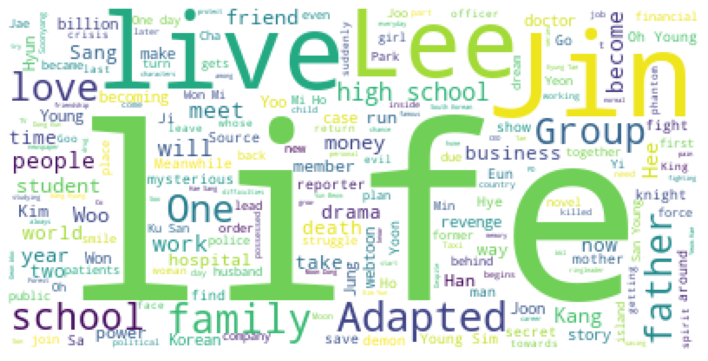

In [36]:
plt.figure(figsize=(10, 8))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()